# <center> Organizacion de datos </center>
#### <center> Curso Rodriguez </center>
## <center> Trabajo practico I: Reservas de Hotel </center>
#### <center> Integrantes del grupo: </center>


<center>

| Apellido y nombre | Padron |
| - | - |
| Ayala, Camila | 107440 |
| Loscalzo, Melina | 106571 |
| Masri, Noah | 108814 |

</center>

#Ejercicio
Para comenzar, vamos a importar las librerias que utilizaremos

In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


from colorama import Fore, Style

#Preparacion del Dataset
Importamos el dataset con el que entrenaremos a nuestro modelo

In [ ]:
ds = pd.read_csv("https://drive.google.com/uc?export=download&id=1QMXDZIPN4kyzTU8wMSBSDtqFq37gpPx1")

Creamos una copia del dataset para no alterar los datos originales

In [ ]:
ds_reservas = ds.copy()

Miramos las dimensiones de nuestro dataset con la funcion shape. Esta devuelve un vector cuya primera posicion es la cantidad de filas, y la segunda la cantidad de columnas.

In [ ]:
ds_reservas.shape

(61913, 32)

In [ ]:
ds_reservas.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'id',
 'is_canceled']

<b>Descripción de los campos</b><br>
* Hotel: tipo de hotel en donde se hizo la reserva <br>
* Lead time: cantidad de tiempo que transcurre desde que se realiza la reserva <br>
* Arrival_date_year: año de hospedaje reservado <br>
* Arrival_date_month: mes de hospedaje reservado <br>
* Arrival_date_week_number: numero de semana del año reservada <br>
* Arrival_date_day_of_month: dia del mes del hospedaje reservado <br>
* Stays_in_weekend_nights: cantidad de dias de fin de semana que contiene la reserva <br>
* Stays_in_week_nights: cantidad de dias de la semana que contiene la reserva <br>
* Adults, Childres, Babies: numero de personas cada uno de estos grupos en la reserva <br>
* Meal: tipo de plan de comidas incluido en la reserva donde:
> 1. BB: incluye solo desayuno
> 2. HB: incluye desayuno y cena
> 3. FB: incluye desayuno, almuerzo y cena
> 4. SC: no incluye ninguna comida
* Country: pais en donde se encuentra el hotel reservado <br>
* Market_segment: medio por el cual se hizo la reserva donde:
> 1. Online TA: mediante una agencia de viaje online
> 2. Offline TA/TO: mediante una agencia u organizacion de viajes de manera presencial 
> 3. Groups: mediante un grupo de viaje
> 4. Direct: por sus propios medios
> 5. Complementary: invitacion por parte del hotel
> 6. Corporate: la empresa realizo la reserva
> 7. Aviation: son empleados de una aerolinea
* Distribution_channel: canal por el cual el huesped conoce el hotel<br>
> 1. TA/TO: mediante una agencia u organizacion de viajes de manera presencial 
> 2. Direct: por sus propios medios
> 3. Corporate: mediante la empresa el consumidor final conoce el hotel
> 4. GDS(Global Distribution System): Plataforma intermediaria entre las agencias de viajes y el consumidor final
* Is_repeated_guest: si un huesped realizo una reserva previamente en ese hotel denotado como "1", en el caso de ser la primera vez se denota como "0" <br>
* Previous_cancellations: el número de reservas previas en las cuales el huésped ha cancelado en el mismo hotel <br>
* Previous_bookings_not_canceled: el número de reservas previas, por el cual el huésped no cancelo en el mismo hotel <br>
* Reserved_room_type: codigo del tipo de habitación por el cual el huésped resevo en el hotel  <br>
* Assigned_room_type: codigo del tipo de habitación asignada al huesped en el momento de check-in <br>
* Booking_changes: cantidad de cambios que se han realizado en la reserva del huesped antes de su llegada <br>
* Deposit_type: tipo de depósito por el cual se ha realizado la reserva<br>
> 1. No Deposit: No se encuentra depositada la reserva
> 2. Non Refund: Se deposito la reserva y esta no es reembolsable
> 3. Refundable: Se deposito la reserva y esta es reembolsable
* Agent: código de la agencia de viajes que ha hecho la reserva <br>
* Company: código de la empresa que ha hecho la reserva<br>
* Days_in_waiting_list: número de días que una reserva estuvo en lista de espera antes de ser confirmada por el hotel <br>
* Customer_type: tipo de cliente por el cual se realizo la reserva<br>
> 1.Trasient: clientes individuales que reservan una o más noches <br>
> 2.Trasient-Party: clientes individuales que viajan en grupo y reservan una o más habitaciones <br>
> 3.Contract: clientes que han firmado un acuerdo a largo plazo con el hotel para reservar habitaciones en fechas específicas <br>
> 4.Group: clientes que reservan un gran número de habitaciones, generalmente como parte de un evento o conferencia <br>
* Adr (Average Daily Rate): tarifa media diaria de una habitación ocupada en un período de tiempo específico <br>
* Required_car_parking_spaces: cantidad de espacios de estacionamiento para el auto que requiere el huesped en su resera <br>
* Total_of_special_requests: cantidad total de solicitudes especiales que un huésped ha hecho al reservar<br>
* Reservation_status_date: fecha en que se actualizó el estado de una reserva de hotel  <br>
* Id: número de identificación de la reserva <br>
* Is_canceled: si la reserva fue cancelada o no <br>

 
 

#Análisis Exploratorio y Preprocesamiento de Datos

# a) Exploración inicial

Damos una preview de los datos, un primer acercamiento al dataset, mostrando las primeras 5 filas de este.

In [ ]:
ds_reservas.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,NaN,0,Transient,229.0,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,NaN,0,Transient,75.0,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,NaN,0,Transient-Party,75.0,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


####Obtenemos información del dataset: Reserva de Hoteles
Generamos una visualizacion en tabla que lista las columnas e info sobre estas; el recuento de valores no nulo, y el tipo de cada una de las variables

In [ ]:
ds_reservas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

Al hacer esto notamos que la columna 'children' almacena valores del tipo float. Dado que esto es una cantidad de personas, esto nos llama la atencion. Debemos ver si esto se debe a que encontramos valores como '1.0', o si encontramos invalidos.

In [ ]:
ds_reservas['children'].unique()

array([ 0.,  2.,  1.,  3., nan, 10.])

No hallamos ninguna anomalia en estos valores, todos son valores posibles. Los valores faltantes seran analizados luego.

####Analizamos las variables cuyo contenido no es claro

Contamos la cantidad de valores distintos que toma la variable ID, ya que no sabemos si esta columna tiene el ID de la reserva, o el ID del huesped.

In [ ]:
ds_reservas['id'].nunique()

61913

Al notar que la cantidad de valores unicos es igual a la cantidad de filas con las que contamos, concluimos que el ID es de la reserva. Dado que el ID es un identificador aleatorio que nada tiene que ver con la cancelacion, esta variable podria ser eliminada. Dado que esta columna es utilizada en Kaggle, no podemos eliminarla, pero la ignoraremos a la hora de realizar futuros analisis.

####Analizamos y clasificamos las variables que se presentan en el dataset:

###<center> Variables cualitativas

<table>
  <tr>
    <th>Nominales</th>
    <th>Ordinales</th>
  </tr>
  <tr>
    <td>Hotel [0]</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Meal [11]</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Country [12]</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Market segment [13]</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Distribution channel [14]</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Reserved room type [18]</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Assigned room type [19]</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Deposit type [21]</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Agent [22]</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Company [23]</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Customer type [25]</td>
    <td>-</td>
  <tr>
    <td>Is canceled</td>
    <td>-</td>
  </tr>
</table>



###<center> Variables cuantitativas

<table>
  <tr>
    <th>Discretas</th>
    <th>Continuas</th>
  </tr>
  <tr>
    <td>Arrival date year [2]</td>
    <td>Lead time[1]</td>
  </tr>
  <tr>
    <td>Arrival date month [3]</td>
    <td>Previous cancelations [16]</td>
  </tr>
  <tr>
    <td>Arrival week number [4]</td>
    <td>Previous bookings not canceled [17]</td>
  </tr>
  <tr>
    <td>Arrival day of month [5]</td>
    <td>Booking changes [20]</td>
  </tr>
  <tr>
    <td>Stays in weekend nights [6]</td>
    <td>Days in waitlist [24]</td>
  </tr>
  <tr>
    <td>Stays in week nights [7]</td>
    <td>Adr [26]</td>
  </tr>
  <tr>
    <td>Adults [8]</td>
    <td>Total special requests [28]</td>
  </tr>
  <tr>
    <td>Children [9]</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Babies [10]</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Required parking spaces [27]</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Reservation status date [30]</td>
    <td>-</td>
  </tr>
</table>


## Variables Cuantitativas

Para analizar las variables cuantitativas, usaremos la funcion describe(). Previo a realizar la descripcion, cambiaremos los meses del año representados con un string a sus respectivos numeros.

In [ ]:
# Definimos el diccionario que asigna un número a cada mes
diccionario_meses = {
  'january': '1',
  'february': '2',
  'march': '3',
  'april': '4',
  'may': '5',
  'june': '6',
  'july': '7',
  'august': '8',
  'september': '9',
  'october': '10',
  'november': '11',
  'december': '12'
}

# Definimos la función que convierte un nombre de mes en su número correspondiente
def mes_a_numero(mes):
  if pd.isna(mes):
    return mes
  elif mes.lower() in diccionario_meses:
    return diccionario_meses[mes.lower()]
  else:
    return mes

# Aplicamos la funcion y convertimos los numeros a enteros en vez de strings
ds_reservas['arrival_date_month'] = ds_reservas['arrival_date_month'].apply(mes_a_numero).astype(int)

Cargamos en un array todas las variables cuantitativas del dataset, y luego aplicamos la funcion describe para estas.

In [ ]:
# creamos un array con todas las columnas que corresponden a variables cuantitativas
cuantitativas_dataset = ['lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights',
                        'stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes',
                       'days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']

# creamos un dataset auxiliar que contenga unicamente estas columnas
ds_var_cuant = ds_reservas[cuantitativas_dataset]

# usamos la funcion describe para obtener data estadistica, como su desvio, su media, su mediana, y otros cuantiles, ademas de sus maximos y minimos
ds_var_cuant.describe()


,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,61913.000000,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,6.566052,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.114790,0.115420,0.195952,2.638977,102.383773,0.049957,0.523703
std,110.717953,0.708389,3.074967,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.993723,1.396359,0.610519,18.619092,47.757640,0.221023,0.775412
min,0.000000,2015.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,23.000000,2016.000000,4.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,78.000000,2016.000000,7.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,172.000000,2017.000000,9.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,2017.000000,12.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,26.000000,70.000000,17.000000,391.000000,510.000000,8.000000,5.000000


In [ ]:
# obtenemos aparte la moda. como esta funcion no acepta null values, primero me deshago de estos, y luego la calculo
ds_var_cuant = ds_var_cuant.dropna()
ds_var_cuant.mode()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,2016,8,33,17,0,2,2,0.0,0,0,0,0,0,62.0,0,0


Notamos que en la columna ADR contamos con un valor negativo como minimo. Dado que esta es una tarifa media, investigaremos mejor para ver de que se trata.

In [ ]:
ds_reservas.query('adr < 0')

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
21124,Resort Hotel,195,2017,3,10,5,4,6,2,0.0,...,273.0,NaN,0,Transient-Party,-6.38,0,0,2017-03-15,869f627f-35fb-42b0-8376-12869739d76e,0


Todo indica que el valor esta mal cargado, ya que $ADR = \frac{Ingresos\ totales\ de\ las\ habitaciones\ vendidas}{Número\ total\ de\ habitaciones\ vendidas}$, y no tendria sentido que ninguno de estos valores sea negativo.


In [ ]:
ds_reservas = ds_reservas.drop(21124)
ds_reservas = ds_reservas.reset_index(drop=True)

A pesar de haber realizado esta depuracion en este modulo, el tratamiento mas detallado de los valores atipicos sera realizado mas en detalle luego, de los casos de los maximos por ejemplo.

## Variables Cualitativas

De este tipo de variable, nos interesa ver de cada columna cuales son los valores que toma, y de estos valores cuales son los mas frecuentes.

In [ ]:
 # creamos un array con todas las columnas que corresponden a variables cualitativas
cualitativas_dataset = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 
                        'agent', 'company', 'customer_type','is_canceled']


# creamos un dataset auxiliar que contenga unicamente estas columnas
ds_var_cual = ds_reservas[cualitativas_dataset]

# iteramos por todas las columnas
for columna in ds_var_cual.columns:
    
    # nos deshacemos de los nulos
    columna_sin_nulos = ds_var_cual[columna].dropna()
    
    # contamos la frecuencia de cada valor único de la columna
    valores = columna_sin_nulos.value_counts()

    cant_distintos = len(ds_var_cual[columna].unique())
    
    # imprimimos los resultados
    print(Fore.BLUE + Style.BRIGHT + f'{columna}:' + Style.RESET_ALL)
    print(f'Cantidad de valores: {cant_distintos}')
    print(f'Valores y numero de apariciones:\n{valores}')
    print('\n')



hotel:
Cantidad de valores: 2
Valores y numero de apariciones:
City Hotel      42129
Resort Hotel    19783
Name: hotel, dtype: int64


meal:
Cantidad de valores: 5
Valores y numero de apariciones:
BB           47836
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64


country:
Cantidad de valores: 150
Valores y numero de apariciones:
PRT    27950
GBR     5732
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64


market_segment:
Cantidad de valores: 8
Valores y numero de apariciones:
Online TA        29269
Offline TA/TO    12384
Groups           11544
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64


distribution_channel:
Cantidad de valores: 5
Valores y numero de apariciones:
TA/TO        51849
Direct        6798
Corporate     3172


##Variables Duplicados


In [ ]:
# Verificar los duplicados en el dataset
duplicates = ds_reservas.duplicated()
print("Numero de duplicados: ", duplicates.sum())

# Filas sin duplicar
ds_reservas.drop_duplicates(inplace=True)
print("Numero de filas:", len(ds_reservas))


Numero de duplicados:  0
Numero de filas: 61912


# b) Visualización de Datos

## Grafico de correlaciones
Como primer acercamiento a los graficos, buscamos un pantallazo general, una muestra de la correlacion entre todas las variables, buscando los valores mediante el metodo de Pearson.

In [ ]:
correlacion = ds_reservas.corr(method = 'pearson')

<ipython-input-19-78637850c3a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = ds_reservas.corr(method = 'pearson')


Visualizamos todos los coeficientes mediante un grafico de calor.

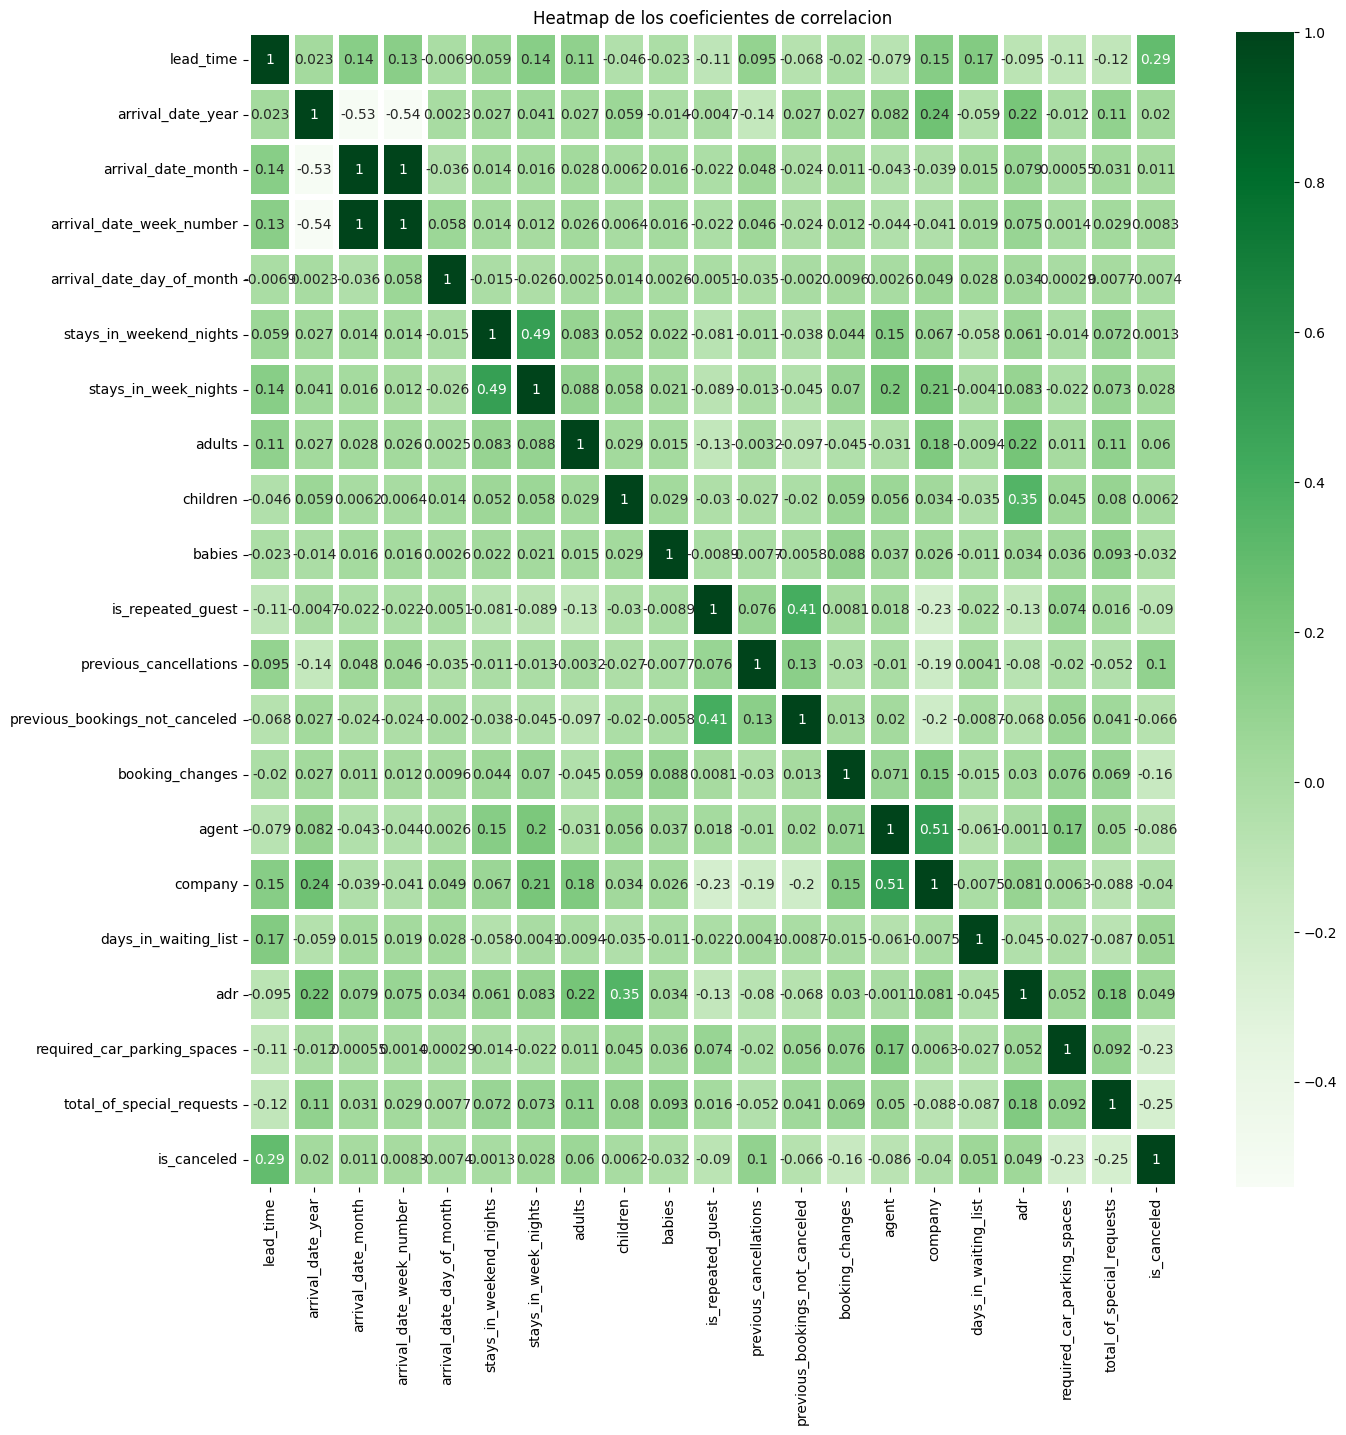

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(correlacion,annot = True, linewidths = 3,cmap='Greens').set(title = "Heatmap de los coeficientes de correlacion")
plt.show()

Imprimimos los coeficientes de correlacion respecto de nuestra variable target, de mayor a menor.

In [ ]:
print(correlacion['is_canceled'].abs().sort_values(ascending=False))

is_canceled                       1.000000
lead_time                         0.293832
total_of_special_requests         0.245011
required_car_parking_spaces       0.225921
booking_changes                   0.159280
previous_cancellations            0.099612
is_repeated_guest                 0.090423
agent                             0.086146
previous_bookings_not_canceled    0.065848
adults                            0.060183
days_in_waiting_list              0.050825
adr                               0.049172
company                           0.040010
babies                            0.032035
stays_in_week_nights              0.028470
arrival_date_year                 0.019943
arrival_date_month                0.011493
arrival_date_week_number          0.008337
arrival_date_day_of_month         0.007391
children                          0.006238
stays_in_weekend_nights           0.001329
Name: is_canceled, dtype: float64


Según los datos obtenidos de los coeficientes de realción:


*   Lead_time tiene la correlación mas fuerte con el target. Esto significa que a medida que aumenta el número de dias entre el momento en que se realiza la reserva y la llegada, los huesped tienen más tiempo de cancelar la reserva o existe más tiempo para que aparezca alguna circunstancia y no se pueda realizar el viaje.
*  En cambio, las variables stays_in_weekend_nights, arrival_date_week_number y children tienen correlación muy baja con el target, lo que nos lleva a pensar que no existe una influencia para la posibilidad de cancelación.
*  La variable previous_cancellations  tiene mas correlación que la variable previous_bookings_not_canceled. Si un huesped canceló reservas anteriormente es mas probable que cancele futuras reservas. 



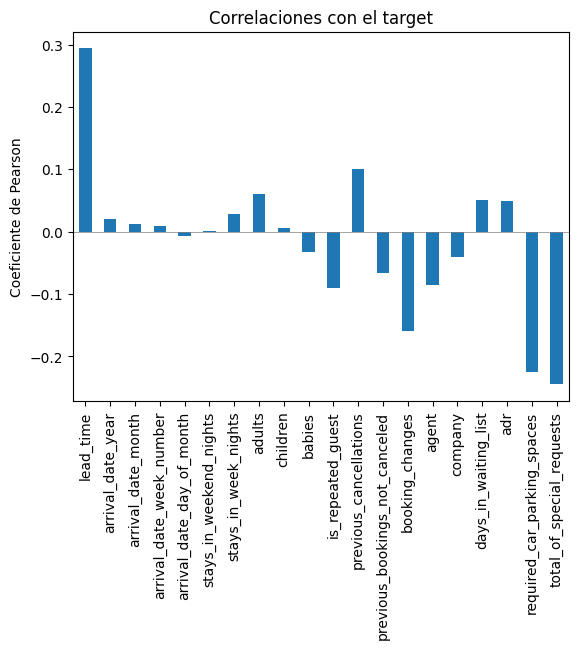

In [ ]:
cor = correlacion.drop('is_canceled')
cor['is_canceled'].plot(kind = 'bar')
plt.title('Correlaciones con el target')
plt.ylabel('Coeficiente de Pearson')
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
plt.show()

## Gráfico de Reservas Canceladas vs Reservas no Canceladas
Contabilizamos la cantidad de reservas canceladas, y realizamos un grafico de torta para ver las proporciones.

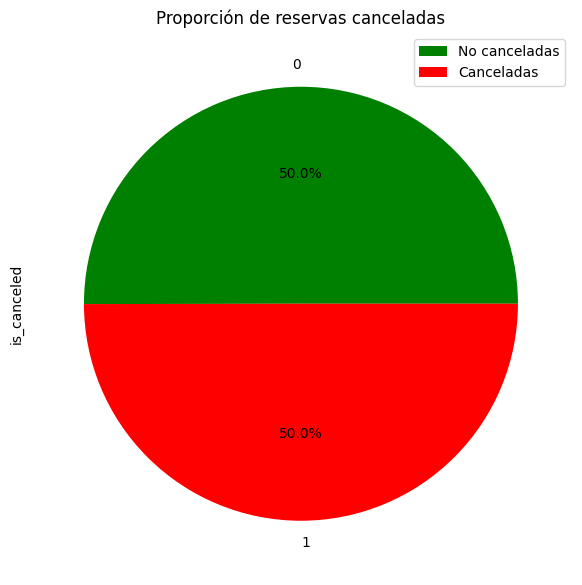

In [ ]:
ds_reservas['is_canceled'].value_counts().plot(kind='pie', autopct='%1.1f%%',figsize=(7,8), colors=['green', 'red'])
plt.title('Proporción de reservas canceladas')
plt.legend(['No canceladas', 'Canceladas'])
plt.show()

## Gráfico de la cantidad de llegadas de turistas por país y año
Realizamos un grafico de los distintos paises y la cantidad de llegadas de estos paises por año.

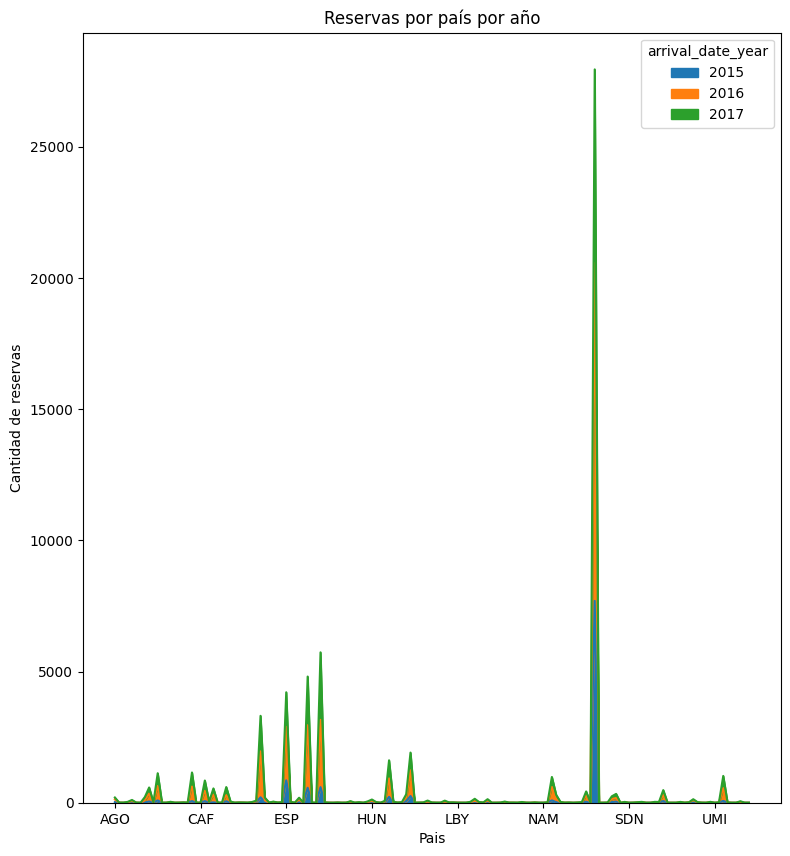

In [ ]:
ds_reservas.groupby('arrival_date_year')['country'].value_counts().unstack().T.plot(kind='area', stacked=True,figsize = (9,10))
plt.title('Reservas por país por año')
plt.xlabel('Pais')
plt.ylabel('Cantidad de reservas')
plt.show()

Dada la gran cantidad de paises, notamos que este grafico no es muy entendible. Es por eso que realizaremos otro, cambiando el tipo de grafico y filtrando los paises que se muestran. Dado el analisis de las variables cualitativas, sabemos que hay 150 paises distintos en nuestro dataset, los cuales se encuentran listados en el archivo de referencias. 

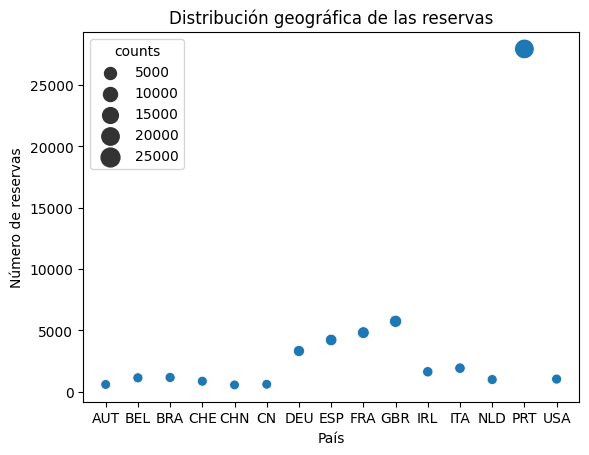

In [ ]:
# agrupamos por pais
paises_del_dataset = ds_reservas.groupby('country').size().reset_index(name='counts')

# filtramos los paises con un numero de reservas menor que 500
paises_del_dataset = paises_del_dataset[paises_del_dataset['counts'] > 500]

# realizamos un grafico de dispersion de la cantidad de reservas por pais
sns.scatterplot(x='country', y='counts', data=paises_del_dataset, size='counts', sizes=(50, 200))
plt.xlabel('País')
plt.ylabel('Número de reservas')
plt.title('Distribución geográfica de las reservas')
plt.show()

Se listan los paises que aparecen mas frecuentemente con su respectiva cantidad de reservas:

In [ ]:
paises_del_dataset = ds_reservas.groupby('country').size().reset_index(name='counts')
paises_del_dataset = paises_del_dataset[paises_del_dataset['counts'] > 1000]
paises_del_dataset['country'].count()
paises_del_dataset.sort_values(by='counts', ascending=False)

,country,counts
112,PRT,27950
48,GBR,5732
45,FRA,4809
40,ESP,4210
34,DEU,3312
69,ITA,1911
64,IRL,1617
18,BRA,1152
10,BEL,1124
142,USA,1021


##Grafico de la relación entre la cantidad de adultos y el precio medio por noche

Consideramos relevante ver la correlacion entre el precio y la cantidad de adultos de la reserva, para ver mejor si hay una relacion directa. Es importante resaltar que en este grafico no se tiene en cuenta el tipo de cuarto reservado.

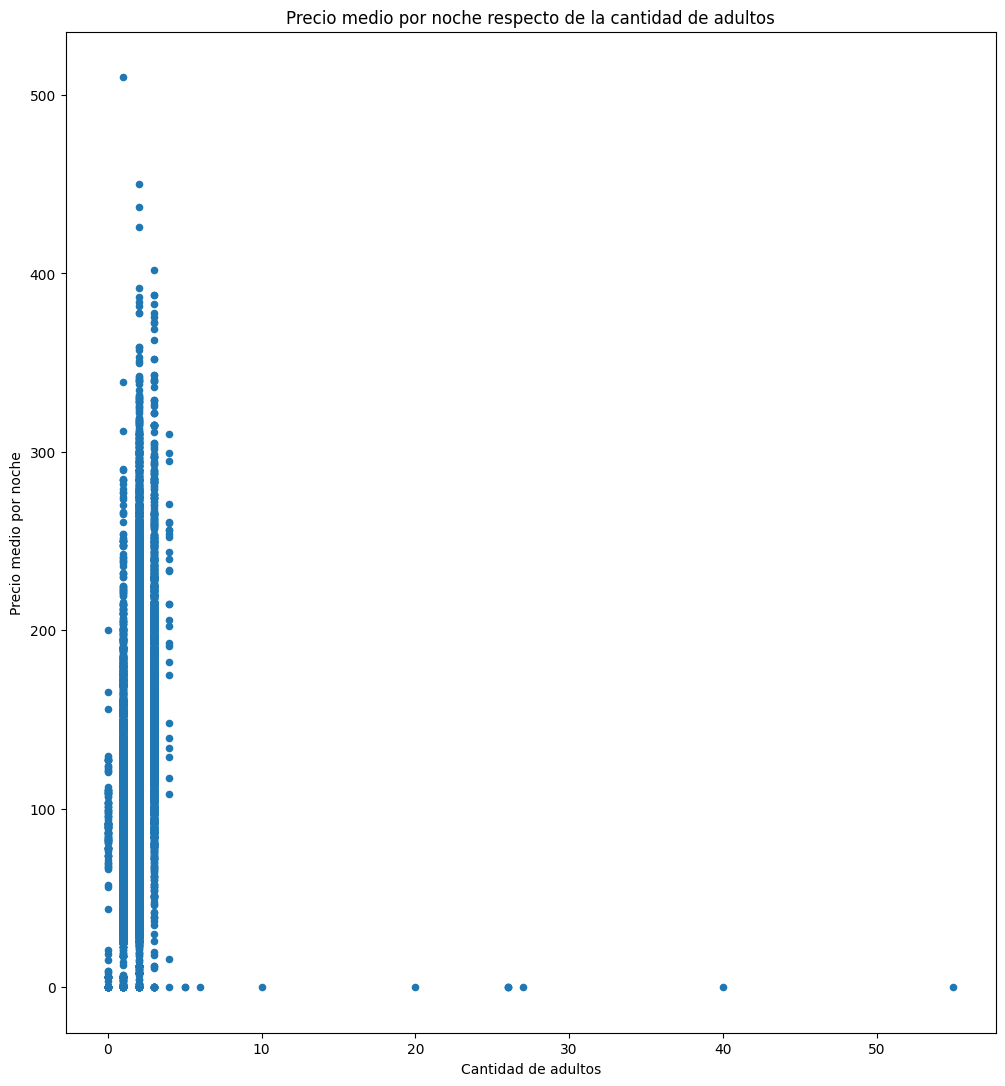

In [ ]:
ds_reservas.plot(kind='scatter', x='adults', y='adr',figsize = (12,13))
plt.title('Precio medio por noche respecto de la cantidad de adultos')
plt.xlabel('Cantidad de adultos')
plt.ylabel('Precio medio por noche')
plt.show()

En base a este grafico, vemos que existe un ADR no nulo para habitaciones en donde la cantidad de adultos es nula. Esto puede deberse a que las habitaciones esten compuestas por unicamente children, o que la reserva este incompleta, lo cual sera analizado en la seccion de valores atipicos. Ademas, vemos que hay valores atipicos de ambas variables; el adr nulo, y cantidades de adultos mayores que 10 en una misma reserva.

##Gráfico de la cantidad de reservas según el tipo de comida elegida

Realizamos este grafico ya que nos interesa visualizar mejor cual es el plan por el que mas opta el publico general.

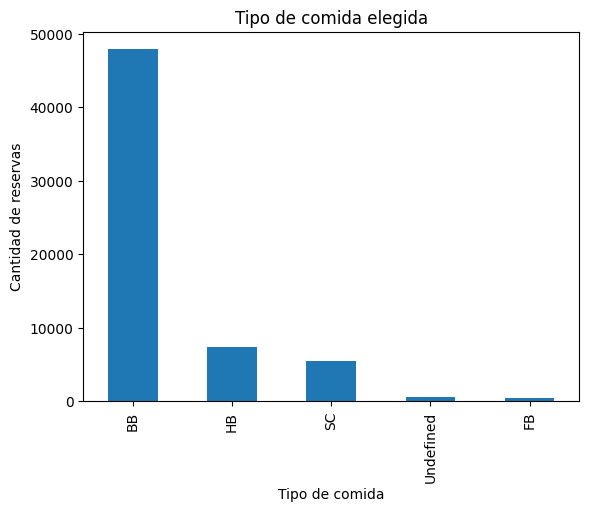

In [ ]:

ds_reservas['meal'].value_counts().plot(kind='bar')
plt.title('Tipo de comida elegida')
plt.xlabel('Tipo de comida')
plt.ylabel('Cantidad de reservas')
plt.show()

Se observa entonces que el plan de comidas mas popular a traves de las reservas es el de BB (Bed and breakfast) que incluye unicamente el desayuno, ademas del hospedaje.

##Grafico de la variación de ADR segun el tipo de habitación

Analizamos el ADR en base al tipo de habitacion para una mejor comprension de lo que representa dicho tipo, para comprender cuales son las habitaciones que suelen ser mas caras.

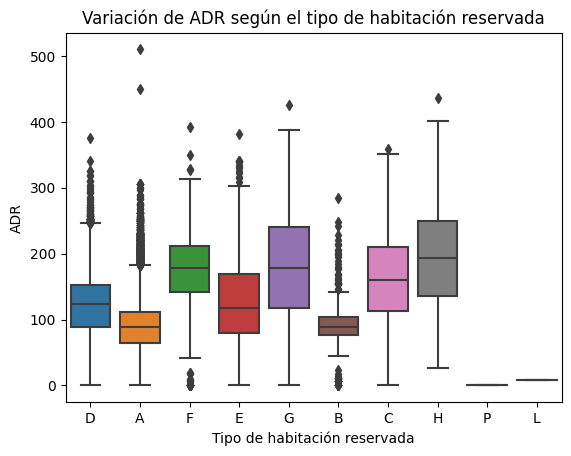

In [ ]:
sns.boxplot(x='reserved_room_type', y='adr', data=ds_reservas)
plt.xlabel('Tipo de habitación reservada')
plt.ylabel('ADR')
plt.title('Variación de ADR según el tipo de habitación reservada')
plt.show()

De este grafico podemos ver como se relacionan los tipos de habitacion con el precio y concluir sobre como se diferencian. El tipo de habitacion mas costosa es el tipo H, por lo cual deberia ser la mas lujosa. El tipo de habitacion A es el que suele costar menos, por lo que podemos concluir que es la habitacion mas basica. Ademas podemos ver que hay muchas reservas de habitaciones de tipo A que tienen un precio mucho mas alto que la media y podria ser util analizar si tienen otras cosas en comun, y como se relacionan con las que no. Sabemos que el precio podria variar tanto por la locacion del hotel como la epoca del año.

Realizamos un analisis de outliers en la seccion d) de este trabajo.

## Grafico de lead time y cancelacion 


Realizamos dos histogramas que muestran las frecuencias de los distintos lead times, uno en las reservas canceladas y otro en las no canceladas. Nos interesa ya que segun los valores de correlacion de Pearson, la variable lead time era la mas correlacionada con nuestro target.


array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

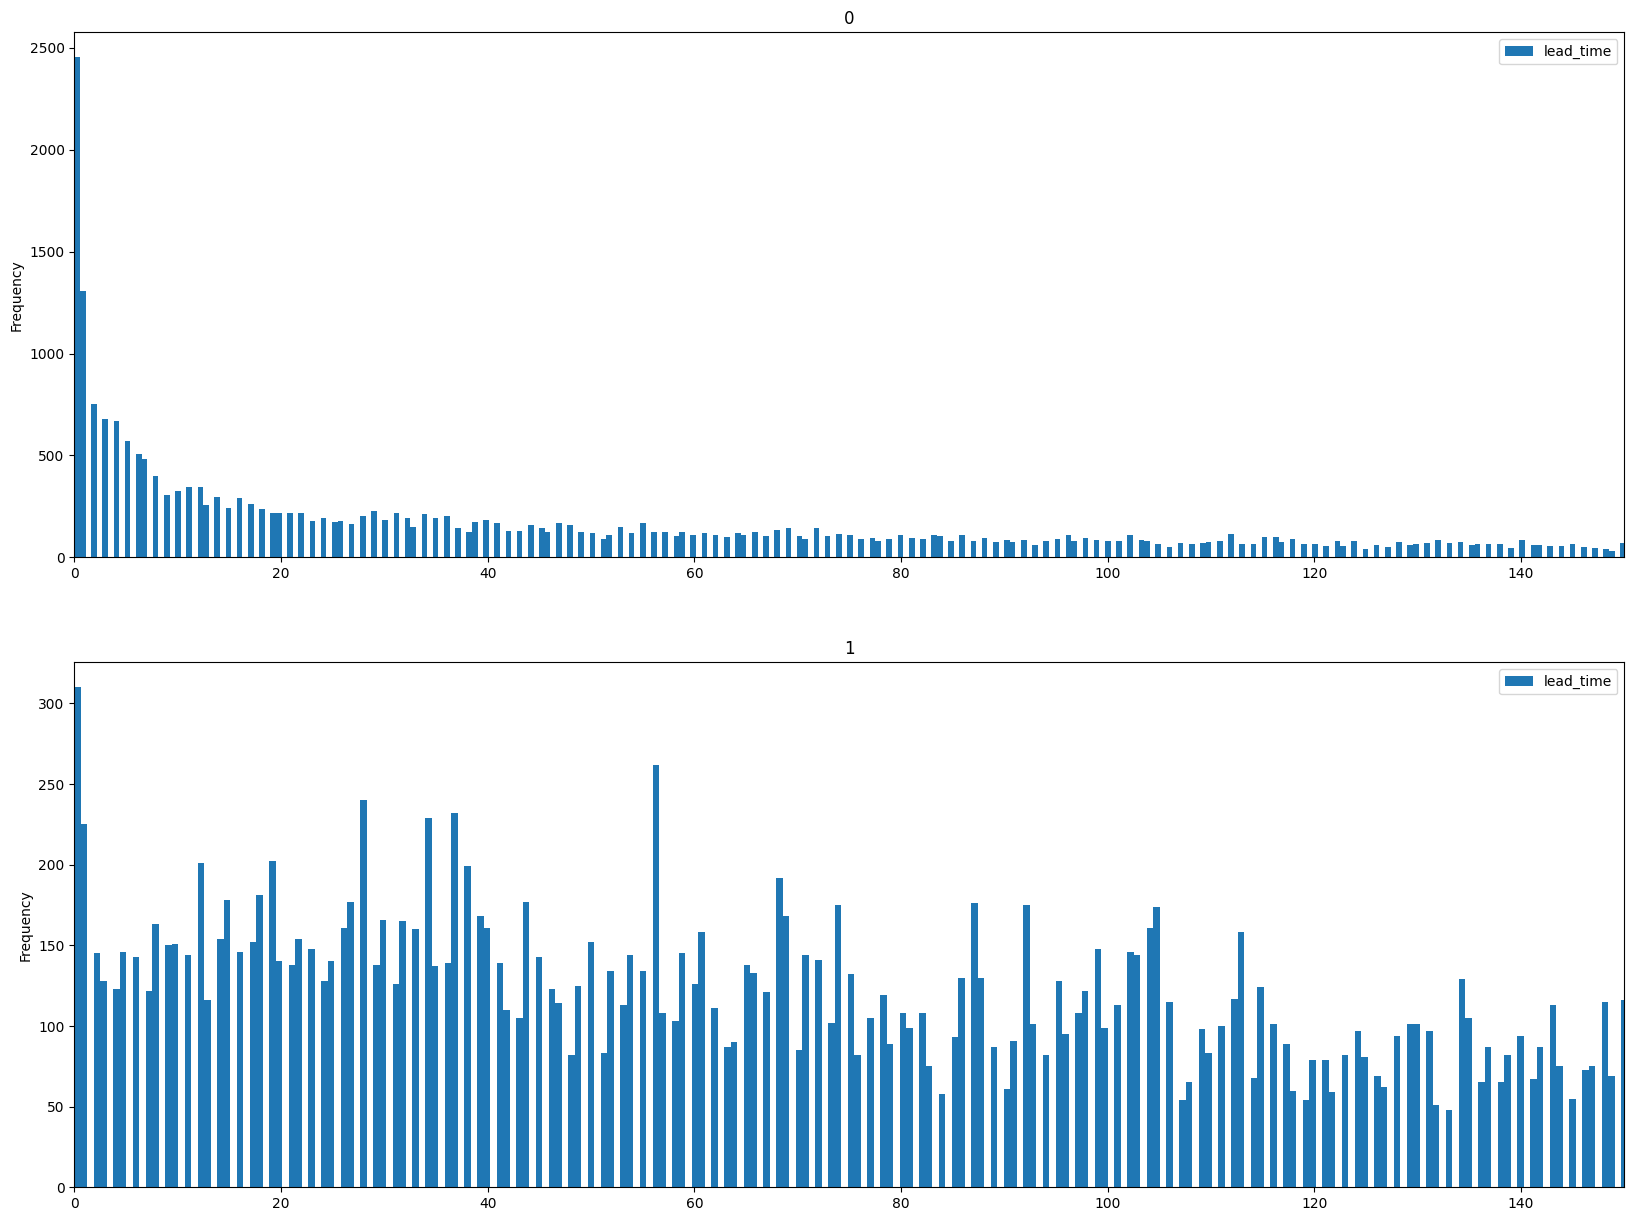

In [ ]:
ds_reservas.plot.hist(column = 'lead_time',by ='is_canceled',figsize = (20,15),bins = 1000,xlim = [0,150])

Se observa que el lead time mas frecuente en ambos casos es 0, es decir, la reserva se efectuo en el momento. 
Notamos que en los casos en que no se cancelo la reserva, fueron mas frecuentes los lead times menores, habiendo un decrecimiento exponencial. Mientras tanto, en las canceladas los valores mayores a cero aparencen con frecuencias similares a lo largo del eje.


Buscamos ver como se comportan en los primeros 10 dias

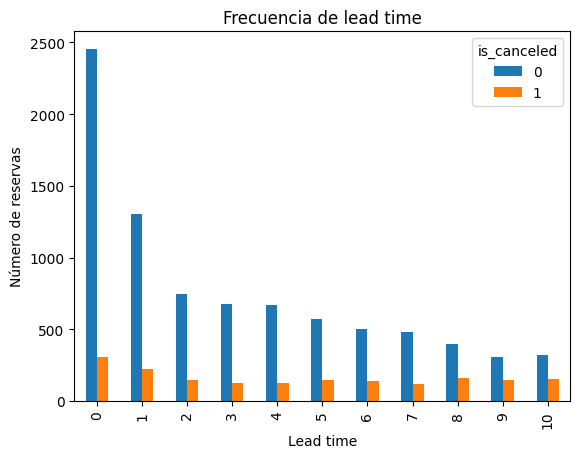

In [ ]:
ds_filtrado = ds_reservas[ds_reservas['lead_time'] <= 10]
reservas_por_mes = ds_filtrado.groupby(['lead_time', 'is_canceled']).size().unstack(fill_value=0)
reservas_por_mes.plot(kind='bar', stacked=False)
plt.title('Frecuencia de lead time')
plt.xlabel('Lead time')
plt.ylabel('Número de reservas')
plt.show()

## Grafico del tipo de deposito y el target

Realizamos este grafico ya que nos parecio relevante comparar el tipo de deposito y el target ya que puede estar relacionado con la intención de mantener su reserva o cancelarla. Logicamente, consideramos que si una reserva ya esta paga, sin posibilidad de reembolsarla, esta es menos probable que sea cancelada que si no hubo ningun tipo de pago, o si este es reembolsable.

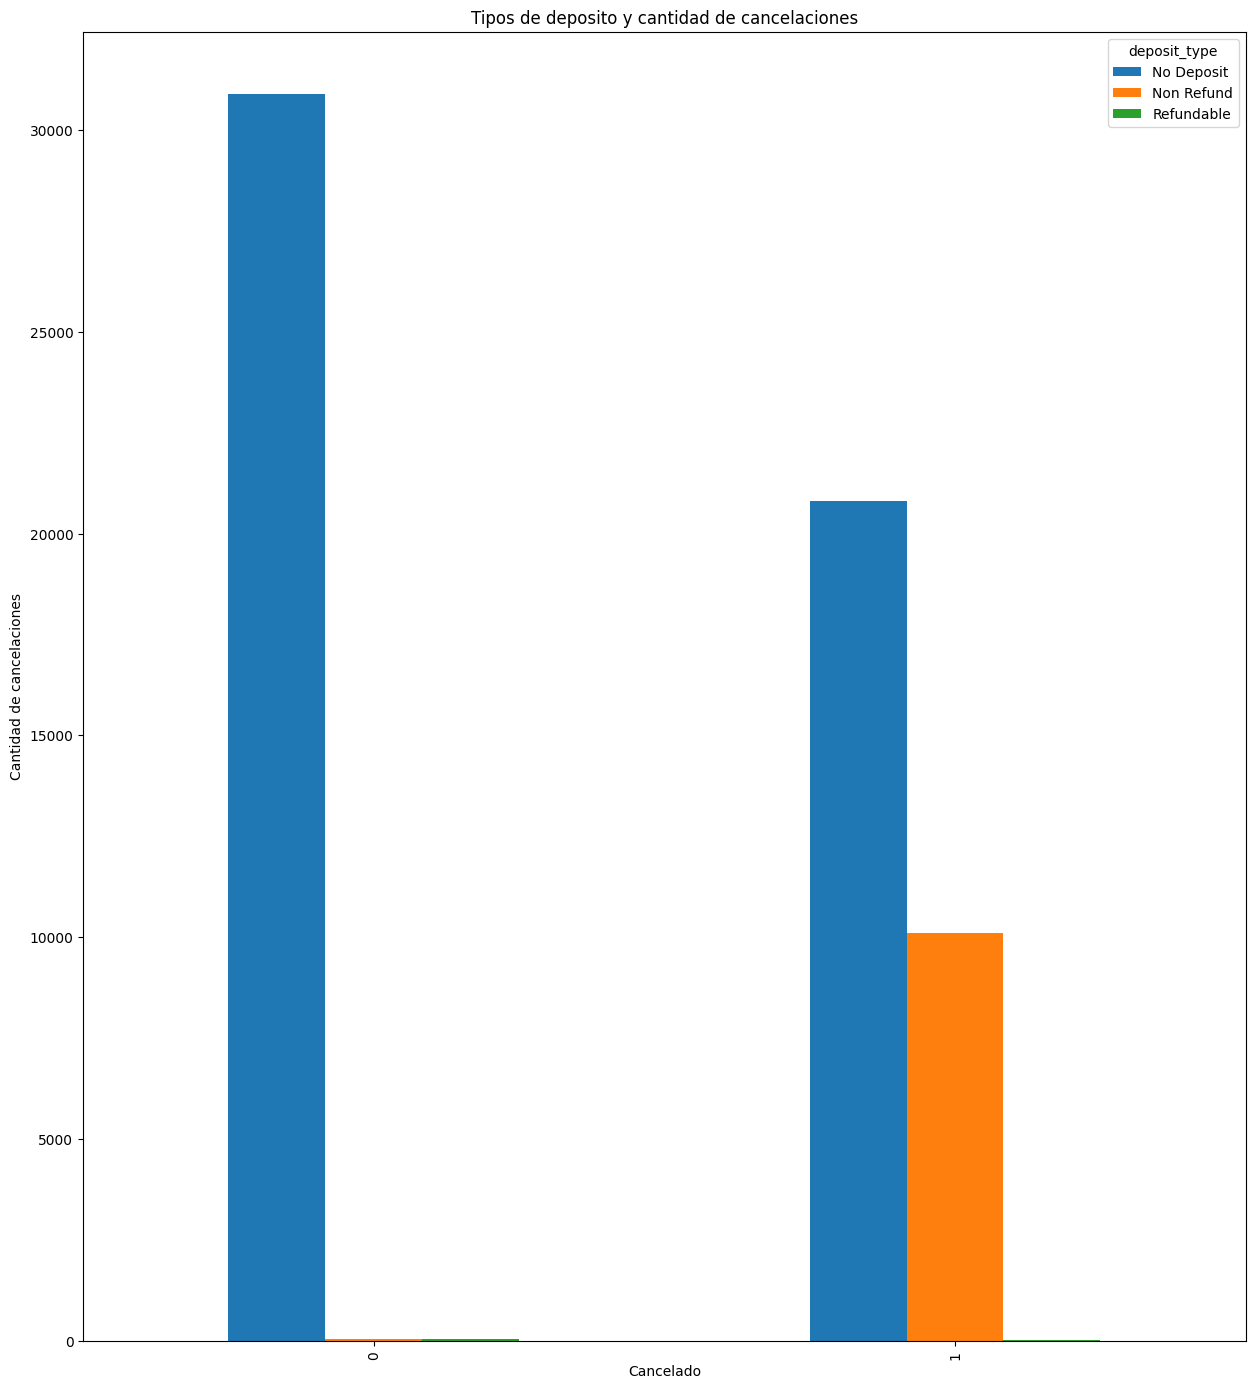

In [ ]:
ds_reservas.groupby('deposit_type')['is_canceled'].value_counts().unstack().T.plot(kind='bar', stacked=False,figsize = (15,17))
plt.title('Tipos de deposito y cantidad de cancelaciones')
plt.xlabel('Cancelado')
plt.ylabel('Cantidad de cancelaciones')
plt.show()

Buscamos los valores exactos, ya que no se pueden distinguir bien en el grafico.

In [ ]:
ds_reservas.groupby('deposit_type')['is_canceled'].value_counts()

deposit_type  is_canceled
No Deposit    0              30884
              1              20800
Non Refund    1              10113
              0                 37
Refundable    0                 50
              1                 28
Name: is_canceled, dtype: int64

Según los valores observados de nuestro dataset podemos sacar algunas conclusiones:

* Las reservas con deposito "Non Refund" se cancelaron mas del 99% de las veces, a diferencia de lo esperado, mientras que las reservas "Refundable" solo un 35% de las reservas se cancelaron.
* Las reservas en las que no se realizo ningun tipo de deposito fueron canceladas un 40% de las veces.



## Grafico del market segment y el target

Nos parecio relevante comparar la variable market_segment y el target, porque podemos obtener información sobre los porcentajes de cancelaciones segun los segmentos de mercado. Es decir, pueden tener diferentes necesidaes y comportamientos a la hora de reservar. Un ejemplo puede ser un huesped que viaja por negocios es menos propenso a cancelar, que un huesped que viaja por vacaciones.

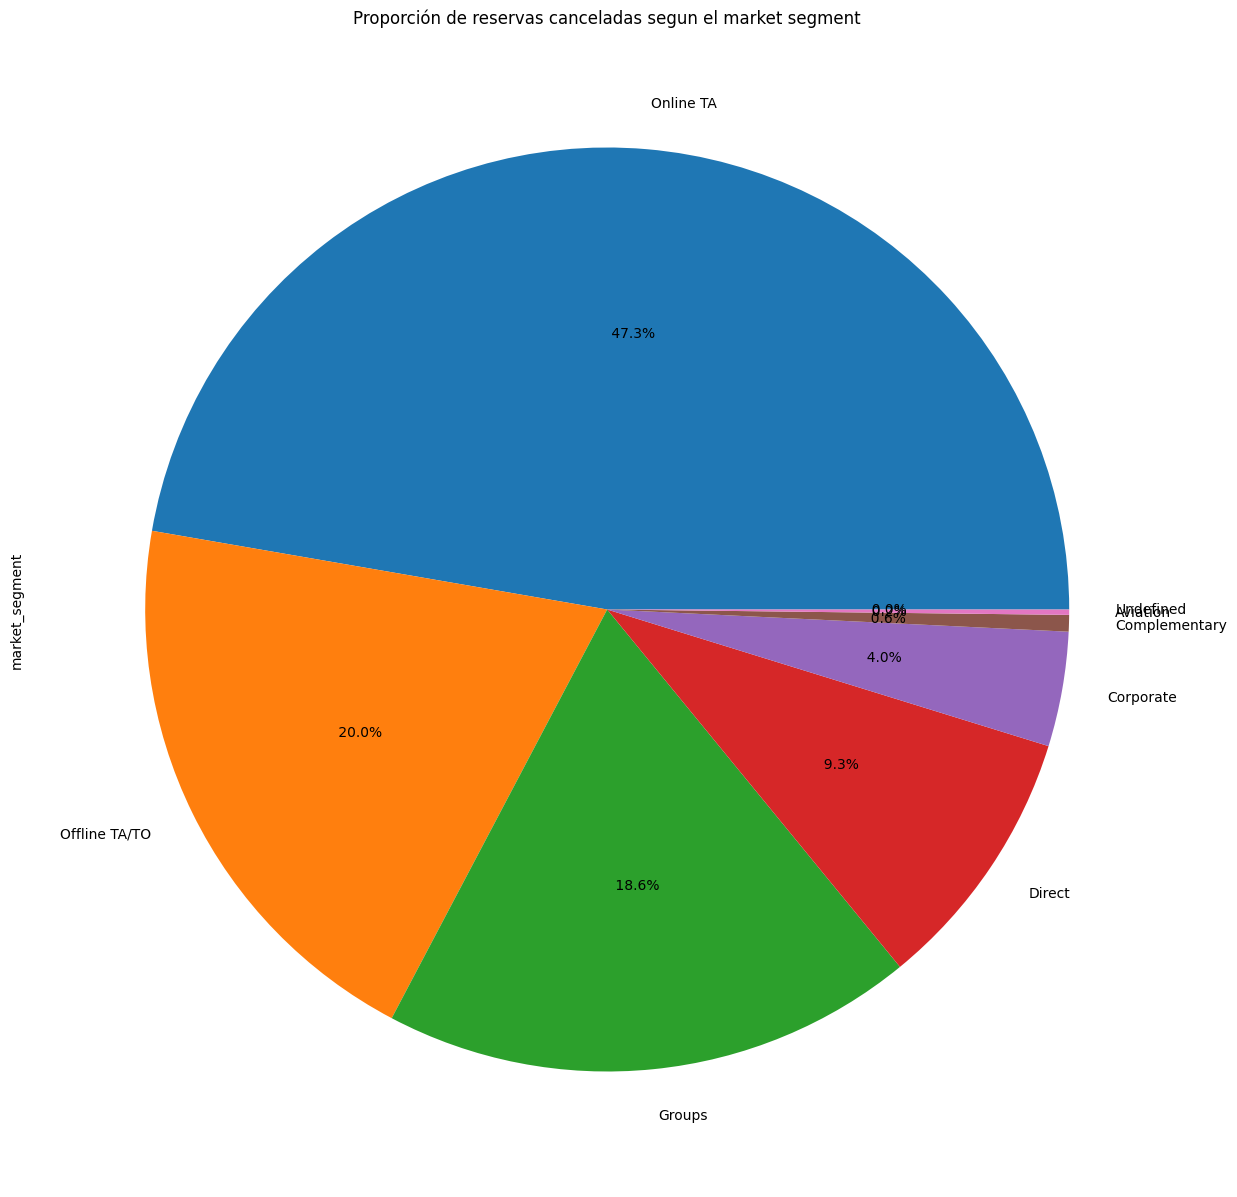

In [ ]:
ds_reservas['market_segment'].value_counts().plot(kind='pie', autopct='%5.1f%%',figsize=(20,15))
plt.title('Proporción de reservas canceladas segun el market segment')
#plt.legend(['No canceladas', 'Canceladas'])
plt.show()

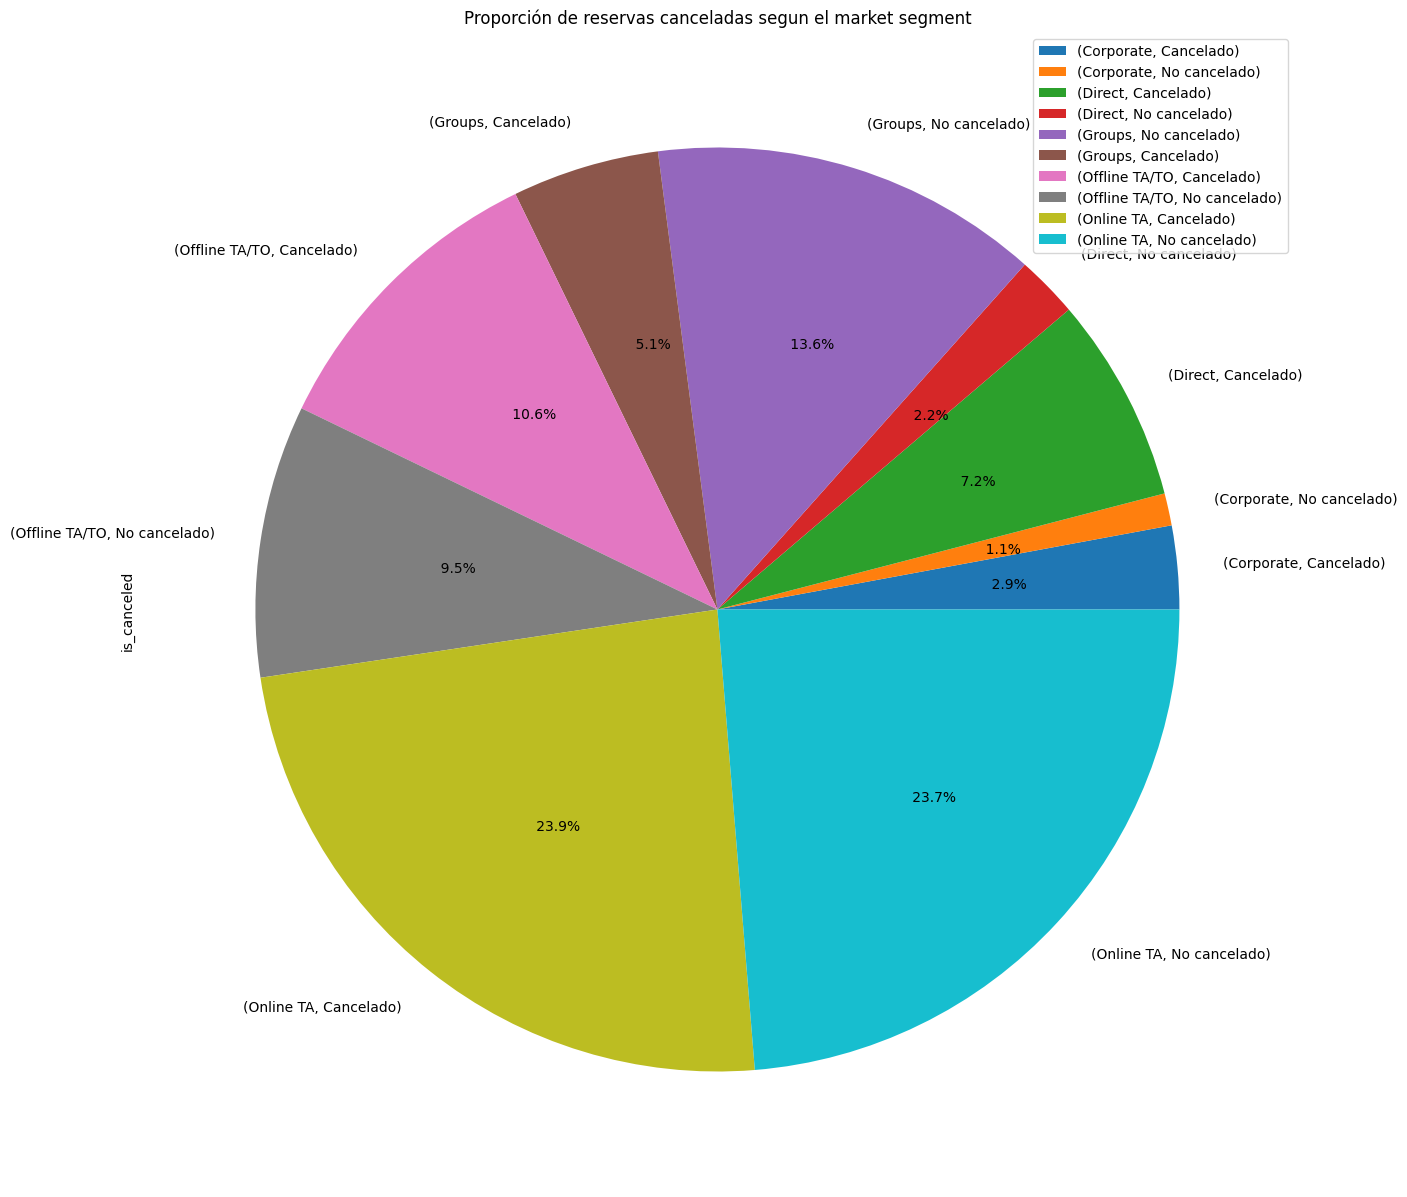

In [ ]:
ds_reservas_aux = ds_reservas.drop(ds_reservas[ds_reservas['market_segment'] == 'Aviation'].index)
ds_reservas_aux = ds_reservas_aux.drop(ds_reservas_aux[ds_reservas_aux['market_segment'] == 'Complementary'].index)
ds_reservas_aux = ds_reservas_aux.drop(ds_reservas_aux[ds_reservas_aux['market_segment'] == 'Undefined'].index)
diccionario = {0: 'Cancelado', 1: 'No cancelado'}
ds_reservas_aux['is_canceled'] = ds_reservas_aux['is_canceled'].replace(diccionario)

ds_reservas_aux.groupby('market_segment')['is_canceled'].value_counts().plot(kind='pie', autopct='%10.1f%%',figsize=(20,15))
plt.legend()
plt.title('Proporción de reservas canceladas segun el market segment')
plt.show()

## Grafico de cantidad de reservas por mes y calculo del mes con mas cancelaciones



In [ ]:
ds_reservas_por_mes = ds_reservas.groupby("arrival_date_month")['arrival_date_month'].count()
mes_mas_popular = ds_reservas_por_mes.idxmax()
print("El mes más reservado es: ",mes_mas_popular)
ds_reservas_por_mes_canceladas = ds_reservas.groupby("arrival_date_month")['is_canceled'].count()
mes_mas_cancelado = ds_reservas_por_mes_canceladas.idxmax()
print("El mes más cancelado es: ",mes_mas_cancelado)


El mes más reservado es:  8
El mes más cancelado es:  8


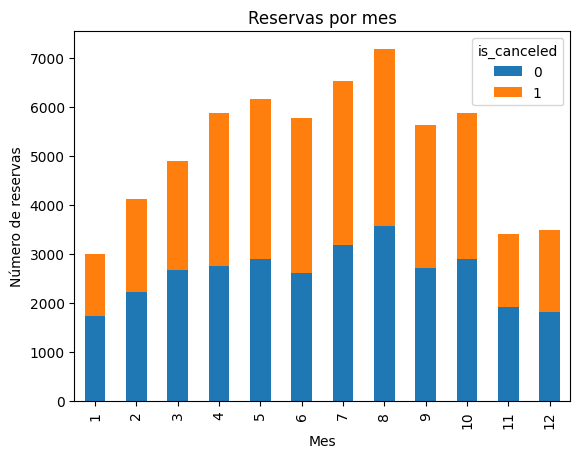

In [ ]:
reservas_por_mes = ds_reservas.groupby(['arrival_date_month', 'is_canceled']).size().unstack(fill_value=0)
reservas_por_mes.plot(kind='bar', stacked=True)
plt.title('Reservas por mes')
plt.xlabel('Mes')
plt.ylabel('Número de reservas')
plt.show()

Según el gráfico, el mes más cancelado y reservado es agosto. Continuando el hilo de análisis, anteriormente buscamos el pais que presenta más reservas en este caso es Portugal. Esto puede deberse que sea un mes de temporada alta, sin embargo ocurre támbien muchas cancelaciones que podrían ser por problemas climaticos que afecten la estadía.

# Grafico de la habitacion esperada y la recibida

Analizamos lo que sucede con el target cuando la habitacion que se asigna a los huespedes es distinta de la que ellos reservaron.

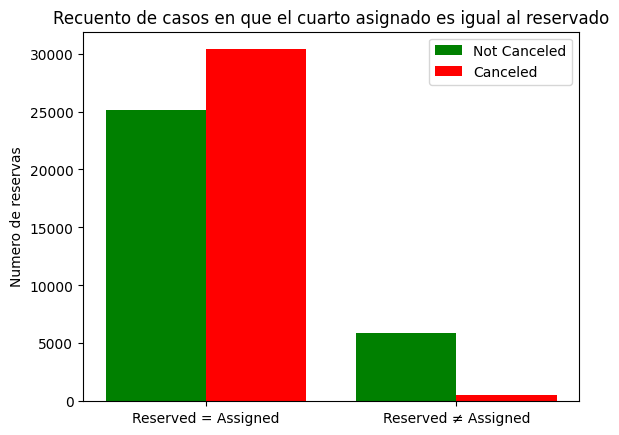

In [ ]:
equal_counts = ds_reservas.loc[ds_reservas['reserved_room_type'] == ds_reservas['assigned_room_type'], 'is_canceled'].value_counts()
unequal_counts = ds_reservas.loc[ds_reservas['reserved_room_type'] != ds_reservas['assigned_room_type'], 'is_canceled'].value_counts()

fig, ax = plt.subplots()
ax.bar([0, 1], [equal_counts[0], unequal_counts[0]], color='green', width=0.4, label='Not Canceled')
ax.bar([0.4, 1.4], [equal_counts[1], unequal_counts[1]], color='red', width=0.4, label='Canceled')

ax.set_xticks([0.2, 1.2])
ax.set_xticklabels(['Reserved = Assigned', 'Reserved ≠ Assigned'])
ax.set_ylabel('Numero de reservas')
ax.set_title('Recuento de casos en que el cuarto asignado es igual al reservado')
ax.legend()
plt.show()

Notamos que en la mayoria de los casos en que se cambia la habitacion, la reserva no se cancela. Esto puede ser coincidencia, como tambien podriamos pensar que, en general, si se realiza un cambio por baja disponibilidad, se suele asignar a los huespedes una habitacion mejor, por lo que estos ya no quieren cancelar, o porque el cambio es efectuado al momento de realizar el check-in, por lo que no tiene que ver el cambio con la cancelacion.

# c) Datos faltantes

Realizamos un recuento de la cantidad de valores nulos que tenemos por cada una de las variables, y vemos que porcentaje representan.

In [ ]:
valoresNulos = ds_reservas.isna()
pd.DataFrame({'Cantidad de valores nulos' : valoresNulos.sum(), 'Porcentaje de valores nulos' : (valoresNulos.sum()) / (len(ds_reservas)) * (100)})


,Cantidad de valores nulos,Porcentaje de valores nulos
hotel,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000
children,4,0.006461


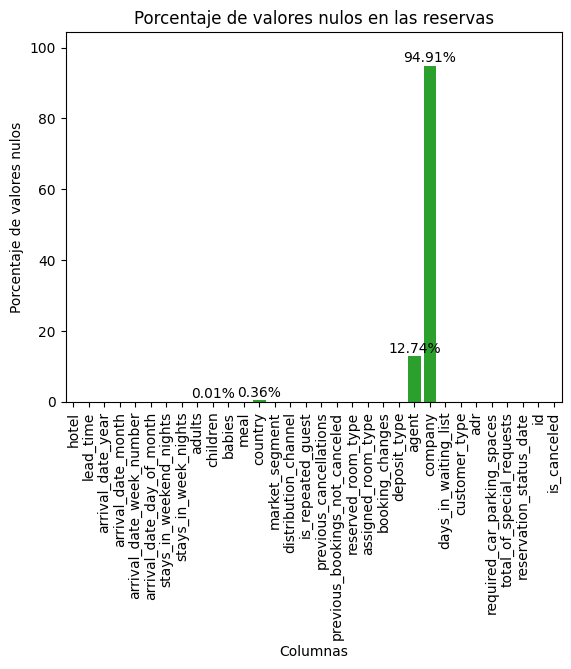

In [ ]:
dataset_con_valores_nulos = ds_reservas.isna()
dataset_porcentajes_nulos = (dataset_con_valores_nulos.sum() / len(ds_reservas)) * 100

fig, ax = plt.subplots()

# Crear un gráfico de barras en los ejes 

color_barras = ['tab:green' if p > 0 else 'gray' for p in dataset_porcentajes_nulos]
ax.bar(x=dataset_porcentajes_nulos.index, height=dataset_porcentajes_nulos, color=color_barras)
ax.set_title('Porcentaje de valores nulos en las reservas')
ax.set_xlabel('Columnas')
ax.set_ylabel('Porcentaje de valores nulos')
ax.tick_params(axis='x', rotation=90)
ax.set_xlim(-0.5, len(dataset_porcentajes_nulos)-0.5)
ax.set_ylim(0, max(dataset_porcentajes_nulos)*1.1)

# Agregar el porcentaje
for i in range(len(dataset_porcentajes_nulos)):
  if dataset_porcentajes_nulos[i] > 0:
    ax.text(x=i, y=dataset_porcentajes_nulos[i]+1, s=f"{dataset_porcentajes_nulos[i]:.2f}%", ha='center')

# Mostrar el gráfico
plt.show()

##Observaciones sobre los valores nulos




*   La cantidad faltante para la variable children es: 4
*   La cantidad faltante para la variable country es: 221
*   La cantidad faltante para la variable Agent es: 7890
*   La cantidad faltante para la variable Company es: 58761

Observando estos dos ultimos campos, pueden significarse que al momento del Check-In no hay dicha información como para el caso de Agent, la reserva no fue realizada por un Agente. Con el mismo criterio, para Company no fue realizada la reserva con una Compañia.

En el caso de children, dado que lo que representan esos 4 datos tiene un orden de magnitud muy bajo, los eliminaremos. Para el caso del pais, luego sera analizado.







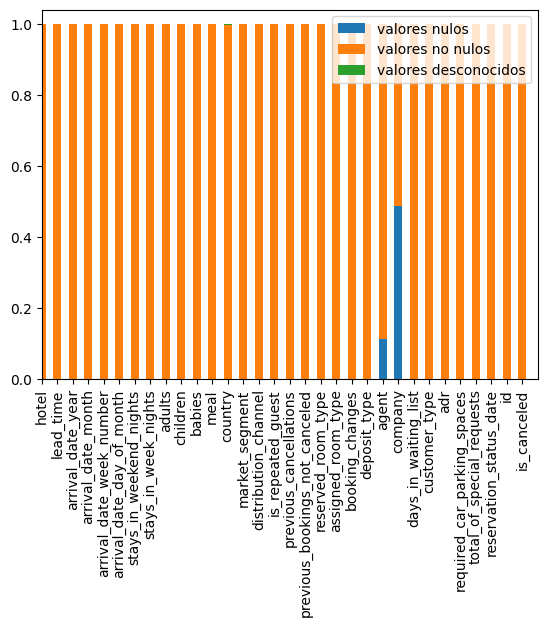

In [ ]:
ds_reservas['country'].fillna('desconocido',inplace= True)

# contar el número de valores nulos, no nulos y desconocidos en cada columna
counts = pd.DataFrame({'valores nulos': ds_reservas.isnull().sum(),
                       'valores no nulos': (ds_reservas != 'desconocido').sum(),
                       'valores desconocidos': (ds_reservas == 'desconocido').sum()})

# normalizar los datos para que representen la proporción de cada tipo de valor en cada columna
counts_norm = counts.div(counts.sum(axis=1), axis=0)

# crear un gráfico de barras apiladas que muestre la proporción de valores nulos, no nulos y desconocidos para cada columna
counts_norm.plot(kind='bar', stacked=True)


plt.xlim(0, 32)  
plt.ylim(0, 1.04)   
plt.show()


Los datos tambien proporcioan la falta de información para country, sin embargo cuando en los hoteles se realiza el Check-in es común que no sepan la nacionalidad. Por esta razon, en los valores faltantes de la variable country van a ser reemplazadas por "desconocido".

In [ ]:
ds_reservas['agent'].fillna('No_agent',inplace= True)

In [ ]:
ds_reservas['company'].fillna('No_company',inplace= True)

In [ ]:
ds_reservas.dropna(subset=['children'], inplace=True)
ds_reservas = ds_reservas.reset_index(drop=True)

In [ ]:
print("El dataset presenta",ds_reservas.isnull().sum().sum(),"valores nulos.")

El dataset presenta 0 valores nulos.


# d) Valores atipicos

## Reserva en Antartida

Al realizar un desgloce de los valores que pueden tomar los paises, vimos que aparecia la Antartida como uno de los destinos.

In [ ]:
ds_reservas[ds_reservas['country'] == 'ATA']

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
19558,City Hotel,7,2017,1,3,20,0,2,1,0.0,...,9.0,No_company,0,Transient,93.0,0,1,2017-01-22,a65b0acd-0b1f-4153-bc42-7585f8b2b68a,0


In [ ]:
from IPython.display import Image
Image(url='https://estilosdevida.bolsamania.com/wp-content/uploads/2017/02/antarctica-whichaway-camp-sleeping-pod-infront-of-the-icefall-02.jpg')


Este caso nos pareció una reserva atipica, debido que en Antartida está protegida por un tratado internacional llamado Tratado Antártico, que establece que la Antártida es un continente dedicado a la ciencia y la paz, y no a la soberanía nacional. Sin embargo, buscando en fuentes externas descubrimos que hay un hotel llamado White Desert.\
"Los traslados se hacen en avión desde Sudáfrica y una vez en el campamento, se pueden realizar distintos viajes a una distancia de hasta 2.500 kilómetros, para poder realizar otras actividades. Emperors and the South Pole es una ventura de ocho días que te permitirá interactuar con pinguinos emperadores y volar en jet hasta el punto geográfico del Polo Sur, con salida desde Ciudad del Cabo. Mountains and Emperors, también es una aventura de ocho días en los que se realizan distintas rutas y actividades por las montañas cercanas al campamento. Si te parece mucho, también puedes optar por una aventura más ligera, una visita de un único día y si te quedas con ganas, puedes combinar varias aventuras."

En este caso coincide el tiempo de la reserva, ya que fue reservada antes de la creación del Hotel. Este valor, si bien es atipico, es probable, por lo que no lo eliminaremos.

En este link se puede visualizar el hotel:
https://youtu.be/8m6OI5nRF4w


## Reservas sin adultos
Buscamos las reservas que no cuentan con adultos, ya que nos llamo la atencion la aparicion de estos cuando se grafico la cantidad de adultos vs adr. 


In [ ]:
ds_reservas.query('adults == 0')

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
96,City Hotel,23,2016,5,21,21,2,4,0,2.0,...,9.0,No_company,0,Transient,128.49,0,0,2016-05-05,dcaf076d-bd38-47dd-8d9d-16be09cd5b08,1
212,City Hotel,315,2017,7,27,7,0,1,0,2.0,...,9.0,No_company,0,Transient,91.85,0,2,2016-09-19,55c9b5f9-b5d0-49a2-9348-c6476a0bd772,1
270,City Hotel,4,2017,2,8,21,0,3,0,0.0,...,No_agent,No_company,0,Transient-Party,0.00,0,0,2017-02-17,6a48e05e-c36a-41d0-b7e0-5f8b92dab109,1
326,City Hotel,53,2016,11,49,29,0,4,0,2.0,...,9.0,No_company,0,Transient,77.86,0,2,2016-12-03,74fe3153-e2ae-4650-a375-05fc52881a56,0
464,City Hotel,64,2015,10,42,16,2,3,0,0.0,...,50.0,No_company,0,Transient-Party,0.00,0,0,2015-10-21,cfe370c2-298a-4de8-82fd-f8d418febd7f,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59977,City Hotel,44,2016,2,7,8,1,3,0,2.0,...,9.0,No_company,0,Transient-Party,66.50,0,1,2016-01-26,8b700cc2-903e-4400-9c68-aba04d69de38,1
60832,City Hotel,33,2017,5,19,9,0,1,0,0.0,...,87.0,No_company,0,Transient,200.00,0,0,2017-05-10,070652d9-948b-47a3-bb96-113627bb5558,0
60989,City Hotel,11,2016,8,34,19,0,1,0,2.0,...,9.0,No_company,0,Transient,127.60,0,1,2016-08-20,17552f62-53e5-4bdf-877d-c2b9769ec27a,0
60998,City Hotel,57,2016,11,46,9,0,2,0,0.0,...,14.0,No_company,0,Transient,165.38,0,2,2016-11-11,c6b4f9bb-b1f7-4765-a4af-5846748c13f4,0


Notamos que hay diversas reservas que cuentan con niños pero ningun adulto. Se considera que esto tiene sentido cuando se esta en un Transient Party, ya que podrian haber adultos en otra reserva Transient asociada, o si estos vienen en grupo, ya que podria tratarse de un viaje educativo, a pesar de que igualmente es extraño que no haya ningun adulto. Veremos ahora las reservas Transient sin adultos, pero con niños.

In [ ]:
ds_reservas.query("adults == 0 and customer_type == 'Transient' and children > 0")

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
96,City Hotel,23,2016,5,21,21,2,4,0,2.0,...,9.0,No_company,0,Transient,128.49,0,0,2016-05-05,dcaf076d-bd38-47dd-8d9d-16be09cd5b08,1
212,City Hotel,315,2017,7,27,7,0,1,0,2.0,...,9.0,No_company,0,Transient,91.85,0,2,2016-09-19,55c9b5f9-b5d0-49a2-9348-c6476a0bd772,1
326,City Hotel,53,2016,11,49,29,0,4,0,2.0,...,9.0,No_company,0,Transient,77.86,0,2,2016-12-03,74fe3153-e2ae-4650-a375-05fc52881a56,0
713,City Hotel,3,2016,9,39,20,0,3,0,2.0,...,9.0,No_company,0,Transient,155.68,0,4,2016-09-23,afaef4d2-3b7c-4549-9844-a1350f4588e7,0
885,City Hotel,215,2016,11,49,30,0,4,0,2.0,...,9.0,No_company,0,Transient,67.26,0,0,2016-08-03,f089a9ff-40bd-4ae3-a70a-913e1412d71c,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55509,City Hotel,232,2017,4,17,27,2,3,0,2.0,...,9.0,No_company,0,Transient,103.05,0,3,2017-04-07,a676b491-6b5e-4005-8fb9-34ead9f02bdb,1
58620,City Hotel,59,2016,7,31,24,2,4,0,3.0,...,No_agent,No_company,0,Transient,9.00,0,2,2016-06-02,4d1be1b7-b087-4d8f-9b94-85a76e1fb9da,1
59694,City Hotel,193,2016,7,28,4,3,10,0,2.0,...,9.0,No_company,0,Transient,81.82,0,2,2016-07-17,a15179e7-1584-4ea7-a474-406fd9243940,0
60989,City Hotel,11,2016,8,34,19,0,1,0,2.0,...,9.0,No_company,0,Transient,127.60,0,1,2016-08-20,17552f62-53e5-4bdf-877d-c2b9769ec27a,0


Dado que no contamos con informacion adicional sobre la edad a la que un hotel considera children, no hay muchas conclusiones que podamos sacar. Dichos niños podrian tener hasta 12 años o hasta 18, edad a la cual ya seria mas razonable que hayan viajado solos. Si notamos en la preview que todos los que se ven, se hospedarian en un City Hotel. Chequeamos si es casualidad o si esto verdaderamente es asi. 

In [ ]:
 # tomamos la porcion del data set que nos interesa
 ds_cut = ds_reservas.query("adults == 0 and customer_type == 'Transient'")
 count_total = len(ds_cut)

 # vemos cuantas de estas reservas fueron hechas en City Hotels
 count_city = ds_cut['hotel'].value_counts()['City Hotel']

 #imprimo los resultados
print("La cantidad de reservas de solo niños reservadas como transient {} y de estas {} son en City Hotels".format(count_total, count_city))

La cantidad de reservas de solo niños reservadas como transient 141 y de estas 139 son en City Hotels


In [ ]:
ds_reservas.shape

(61908, 32)

Dado que todos son en city hotels, podria tratarse de algun viaje escolar, alguna visita a algun familiar, entre otros, por lo que por el momento los dejaremos.

Analizamos ahora la existencia de reservas que no tengan ninguna persona:

In [ ]:
ds_reservas.query("adults == 0 and children == 0 and babies == 0")

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
270,City Hotel,4,2017,2,8,21,0,3,0,0.0,...,No_agent,No_company,0,Transient-Party,0.00,0,0,2017-02-17,6a48e05e-c36a-41d0-b7e0-5f8b92dab109,1
464,City Hotel,64,2015,10,42,16,2,3,0,0.0,...,50.0,No_company,0,Transient-Party,0.00,0,0,2015-10-21,cfe370c2-298a-4de8-82fd-f8d418febd7f,0
2249,City Hotel,26,2017,6,25,19,1,4,0,0.0,...,9.0,No_company,0,Transient,90.00,0,1,2017-06-24,ebf0cb8f-fb23-4742-ba20-99d6805fc046,0
2408,City Hotel,0,2017,3,11,17,0,0,0,0.0,...,9.0,No_company,0,Transient,0.00,0,0,2017-03-17,d9dc2c34-8489-4d83-b998-12d32ae90caa,0
2474,City Hotel,244,2016,7,28,6,2,4,0,0.0,...,19.0,No_company,0,Transient,0.00,0,0,2016-02-23,3c52496c-eb31-4333-9368-f82546757556,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57221,City Hotel,244,2016,7,28,6,2,4,0,0.0,...,19.0,No_company,0,Transient,0.00,0,0,2016-02-23,4899b4cc-4a9b-4de8-8984-5b3bf90ebdd5,1
57768,City Hotel,0,2016,7,30,19,0,1,0,0.0,...,14.0,No_company,0,Transient,0.00,0,1,2016-07-20,1912dcfb-8ad7-4398-9881-5354d437dbcb,0
59384,City Hotel,0,2015,8,33,11,2,10,0,0.0,...,No_agent,38.0,0,Group,0.00,0,0,2015-08-23,9f5ef1d3-da56-4869-bc49-8a442ef39433,0
60832,City Hotel,33,2017,5,19,9,0,1,0,0.0,...,87.0,No_company,0,Transient,200.00,0,0,2017-05-10,070652d9-948b-47a3-bb96-113627bb5558,0


Dado que es imposible que una reserva no sea hecha por nadie, estos valores seran eliminados. Se podria realizar un analisis intensivo para intentar completar los valores mal cargados, pero dado que no son muchos, es preferible eliminar estos que generar valores de mentira; no vale la pena dicho analisis.

In [ ]:
indexes = ds_reservas[ (ds_reservas['adults'] == 0) & (ds_reservas['children'] == 0) & (ds_reservas['babies'] == 0)].index
ds_reservas.drop(indexes , inplace=True)

In [ ]:
ds_reservas.shape

(61832, 32)

##Reservas cuyo ADR en relacion con el tipo de cuarto esta fuera de la media

In [ ]:
# Calcular el rango intercuartil y los límites de los outliers
q1 = ds_reservas['adr'].quantile(0.25)
q3 = ds_reservas['adr'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identificar los outliers severos
outliers = ds_reservas[(ds_reservas['adr'] < lower_bound) | (ds_reservas['adr'] > upper_bound)]
print("Outliers severos:")
print("Fila     ADR")
print(outliers['adr'])

Outliers severos:
Fila     ADR
2        229.00
111      227.25
173      213.00
217      240.00
238      302.50
          ...  
61829    305.00
61844    232.33
61866    233.00
61884    263.00
61898    220.00
Name: adr, Length: 2025, dtype: float64


Realizamos sobre estas mismas variables un grafico de Local Outlier Factor(LOF) 

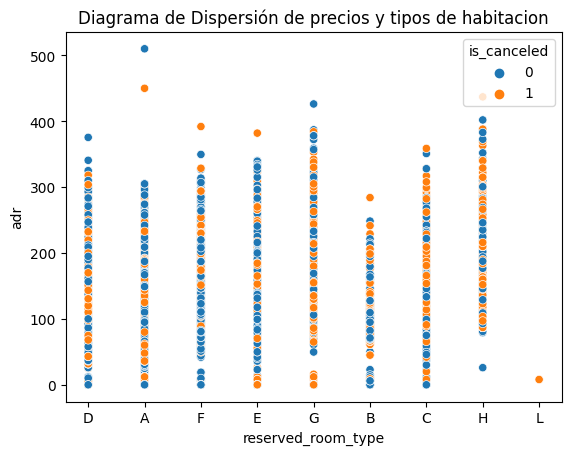

In [ ]:
sns.scatterplot(x=ds_reservas['reserved_room_type'], y=ds_reservas['adr'], hue=ds_reservas['is_canceled'])
plt.title('Diagrama de Dispersión de precios y tipos de habitacion')
plt.show()

Los casos en lo cuales el precio esta muy lejos de la media pero es muy elevado puede ser coherente, podria ser explicado con la ubicacion, entre otros factores. Analizamos mas detallamente con los que se encuentran debajo de la media, en especial los que son cero.

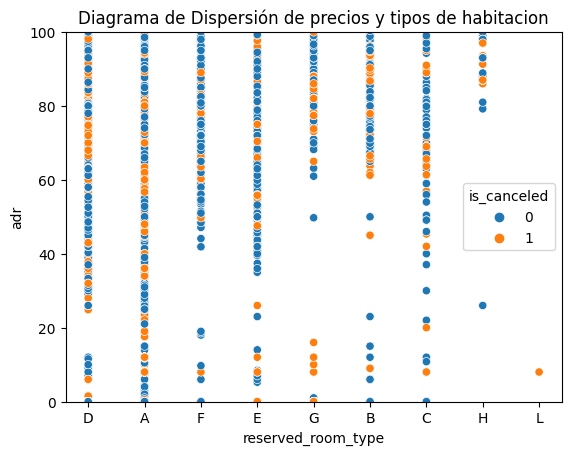

In [ ]:
sns.scatterplot(x=ds_reservas['reserved_room_type'], y=ds_reservas['adr'], hue=ds_reservas['is_canceled'])
plt.title('Diagrama de Dispersión de precios y tipos de habitacion')
plt.ylim(0, 100)
plt.show()

In [ ]:
null_adr = ds_reservas[ds_reservas["adr"] == 0]
len(null_adr)

821

Al ser tantos los datos con valor 0, no vamos a optar por eliminarlos, sino que decidimos reemplazar estos valores por su media.

In [ ]:
media_adr_por_tipo_habitacion = ds_reservas.groupby('reserved_room_type')['adr'].mean()
ds_reservas['adr'] = ds_reservas.groupby('reserved_room_type')['adr'].transform(lambda x: x.replace(0, x.mean()))

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled


Consideramos que iba a ser mas significativo si en vez de reemplazarlo por la media del adr en general, lo reemplazabamos por la media en base al tipo de cuarto reservado, ya que hay una correlacion entre el precio y el tipo de cuarto.

#Reservas cuya cantidad de adultos se va de la media

Luego de describir a las variables en la exploracion inicial, vimos que habia una cantidad maxima de adultos de 55, por lo que nos quedo pendiente ver las reservas que se pasan de una cantidad de adultos que consideramos natural.

<Axes: ylabel='adults'>

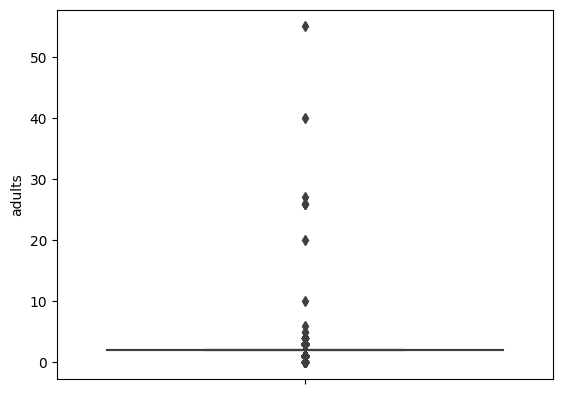

In [73]:
sns.boxplot(y=ds_reservas['adults'])

Notamos que la variacion es tan amplia que no podemos ni visualizar una caja.

In [83]:
outliers=ds_reservas[ds_reservas['adults']>10]
pd.options.display.max_columns = None
outliers

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
4064,Resort Hotel,304,2015,9,36,3,0,3,40,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,No_agent,No_company,0,Group,102.501242,0,0,2015-01-02,ebb06f2f-1c79-490c-ae9f-8f7ba838d328,1
11830,Resort Hotel,334,2015,10,42,12,2,5,20,0.0,0,BB,PRT,Direct,Direct,0,0,0,D,D,0,No Deposit,No_agent,No_company,0,Group,102.501242,0,0,2015-01-02,b169d836-a93c-43a3-8bb4-9ec2afa66483,1
19146,Resort Hotel,354,2015,9,39,26,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.0,No_company,0,Group,102.501242,0,0,2015-01-02,edcaa4e3-8b46-4812-9d09-672cd8b73589,1
38302,Resort Hotel,340,2015,9,37,12,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.0,No_company,0,Group,102.501242,0,0,2015-01-02,f386dc39-94e7-4b56-9609-d12d80d9a6a8,1
55108,Resort Hotel,349,2015,9,39,21,1,3,27,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,No_agent,No_company,0,Group,102.501242,0,0,2015-01-02,6ed0d330-fea1-4b4e-b9e8-cbdcdc514d7c,1
59054,Resort Hotel,333,2015,9,36,5,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.0,No_company,0,Group,102.501242,0,0,2015-01-02,62e325e1-4d46-4794-8d32-100a756074db,1
59160,Resort Hotel,338,2015,10,41,4,2,0,55,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,No_agent,No_company,0,Group,102.501242,0,0,2015-01-02,9bf89c35-d6aa-4dfb-a0cb-2a3eb30bafd2,1


Vemos que todas las reservas fueron hechas en grupo, y que son todas de fechas similares, casi todas reservaron el mismo tipo de cuarto, 3 comparten agente, son todas en Portugal en un resort y pareciera que loggearon a la vez el estado de la reserva. Todas estas cancelaron. Estas reservas tienen cantidades de adultos demasiado grandes, apesar de ser en grupo. Consideramos que eliminarlas es la mejor opcion.

In [86]:
indexes = ds_reservas[ds_reservas['adults']>10].index
ds_reservas.drop(indexes , inplace=True)

#Conclusiones
Queda mucho que trabajar sobre el dataset, hay ciertas variables que todavia no estamos tan seguras de que nos vayan a servir, otras que se van muy lejos de la media, entre otros, pero hemos realizado buenos descubrimientos y los hemos tratado de la mejor manera que pudimos. 